# Practicel ML - KNN

### Full Name :  AmirReza Azari
### Student Number :  99101087

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Inspect the first rows of the dataframe

In [2]:
df = pd.read_csv('train.csv')
print(df.head())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          3  Life Sciences              1            1883   
1                 1          4  Life Sciences              1            1585   
2                 3          3          Other              1            1478   
3                 9          3      Marketing              1            1965   
4                10          3      Marketing              1             722   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                        

Calculate the number of samples

In [3]:
num_samples = df.shape[0]
print('Number of samples:', num_samples)

Number of samples: 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [4]:
unique_values = df.nunique()
print(unique_values)
print("############################")
print(df['Attrition'].unique())

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [5]:
removed = [col for col in df.columns if df[col].nunique() < 2]
df = df.drop(columns=removed)
print(df.head())
print(df.nunique())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 7          3  Life Sciences            1883   
1                 1          4  Life Sciences            1585   
2                 3          3          Other            1478   
3                 9          3      Marketing            1965   
4                10          3      Marketing             722   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        4  ...                 3                         2   
1                        2  ..

Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [6]:
# handle uniqueness
mapping = {'Non-Travel': 0,
           'Travel_Rarely': 1,
           'Travel_Frequently': 2}

In [7]:
# Map the column
df['BusinessTravel_num'] = df['BusinessTravel'].map(mapping)
mean_bta = df.groupby('Age')['BusinessTravel_num'].mean()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_num
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,2,0,11,2,3,3,2,1,2,1
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,1,0,15,5,3,1,0,0,0,1
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,4,0,15,2,3,13,9,3,12,1
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,1,0,7,5,3,7,7,0,7,1
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,4,0,10,2,2,10,7,0,8,1


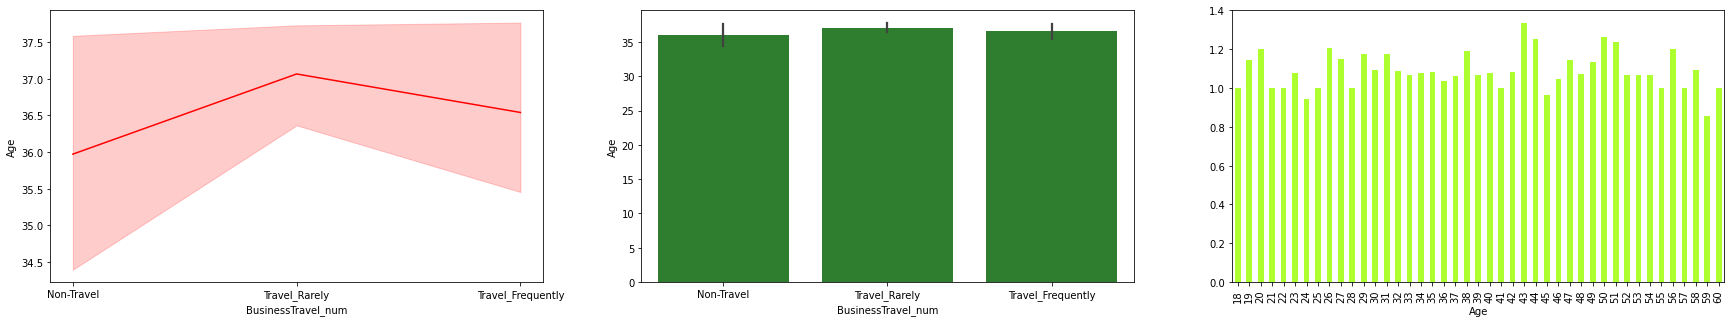

In [8]:
# plot
plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
sns.lineplot(x='BusinessTravel_num', y='Age', data=df, color='red')
plt.xticks(ticks=[0, 1, 2], labels=mapping.keys())

plt.subplot(1, 3, 2)
sns.barplot(x='BusinessTravel_num', y='Age', data=df, color='forestgreen')
plt.xticks(ticks=[0, 1, 2], labels=mapping.keys())

plt.subplot(1, 3, 3)
mean_bta.plot(kind='bar', color='greenyellow')

plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

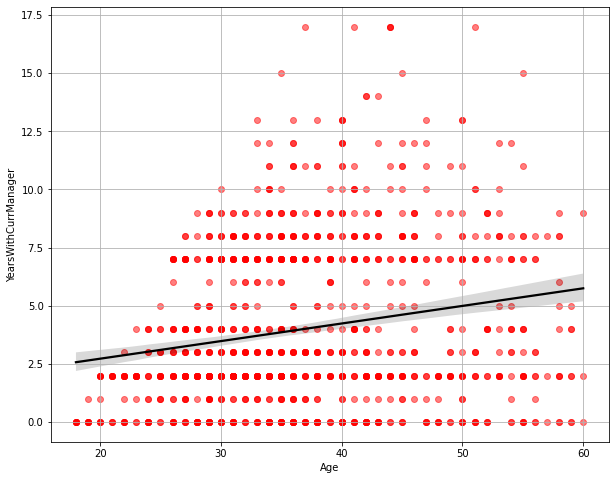

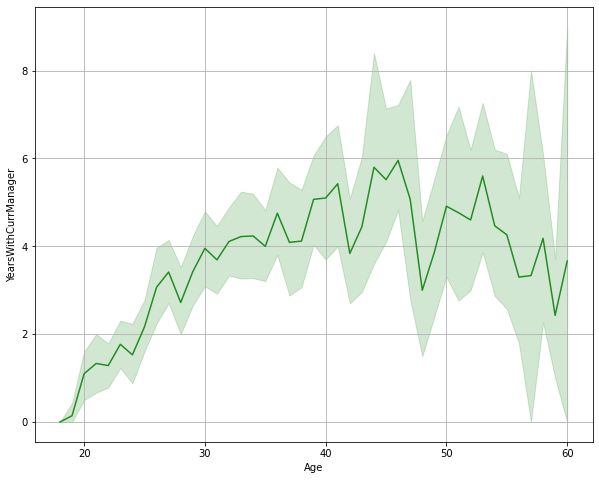

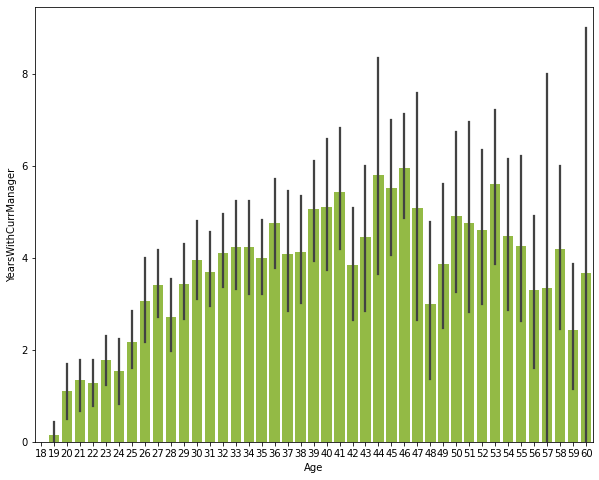

Correlation: 0.19872949548244348


In [9]:
plt.figure(figsize=(10, 8))

plt.scatter(df['Age'], df['YearsWithCurrManager'], alpha=0.5, color='red')
sns.regplot(x="Age", y="YearsWithCurrManager", data=df, scatter=False, color="black")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.lineplot(x='Age', y='YearsWithCurrManager', data=df, color='forestgreen')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='Age', y='YearsWithCurrManager', data=df, color='yellowgreen')
plt.grid(False)
plt.show()

correlation = df[['Age', 'YearsWithCurrManager']].corr().iloc[0, 1]
print(f'Correlation: {correlation}')

Plot the average MonthlyIncome against the YearsAtCompany. 

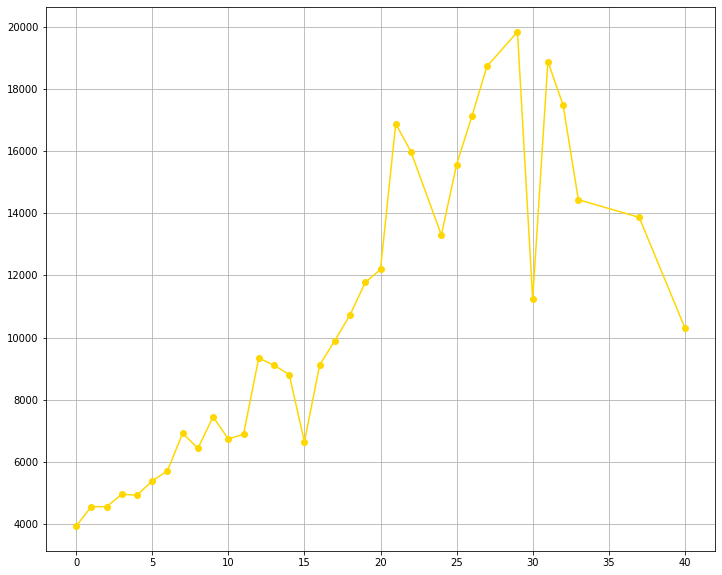

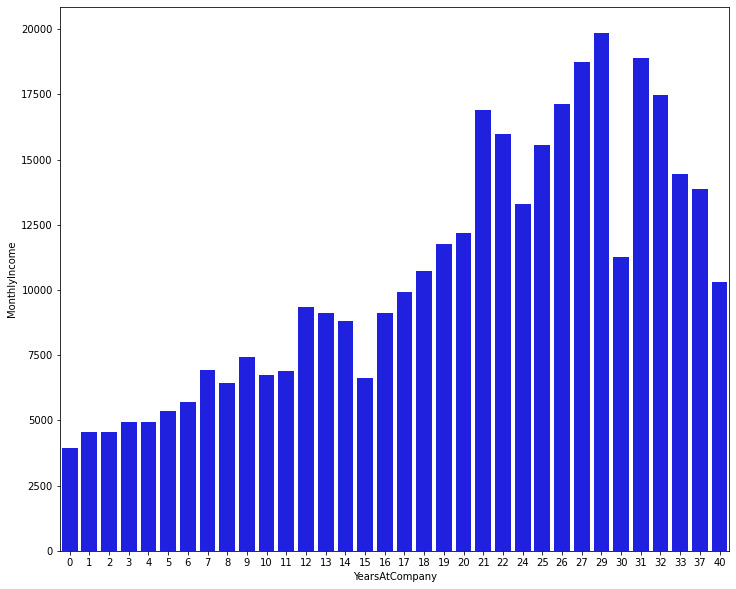

In [10]:
MI_mean = df[["MonthlyIncome", "YearsAtCompany"]].groupby("YearsAtCompany").mean().reset_index()

plt.figure(figsize=(12, 10))
plt.plot(MI_mean["YearsAtCompany"], MI_mean["MonthlyIncome"], marker='o', color='gold')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 10))
sns.barplot(x='YearsAtCompany', y='MonthlyIncome', data=MI_mean, color='blue')
plt.grid(False)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [11]:
# Label encode
le = LabelEncoder()
categories = ['Attrition', 'BusinessTravel', 'Department', 
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

for col in categories:
    df[col] = le.fit_transform(df[col])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_num
0,29,0,2,592,1,7,3,1,1883,4,...,2,0,11,2,3,3,2,1,2,1
1,36,0,2,884,2,1,4,1,1585,2,...,1,0,15,5,3,1,0,0,0,1
2,34,0,2,1326,2,3,3,4,1478,4,...,4,0,15,2,3,13,9,3,12,1
3,27,0,2,954,2,9,3,2,1965,4,...,1,0,7,5,3,7,7,0,7,1
4,32,0,2,929,2,10,3,2,722,4,...,4,0,10,2,2,10,7,0,8,1


In [12]:
# split into train and validation
train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(train, test_size=0.25, random_state=1)

In [13]:
# lens of train and validation datasets
print('Len of training dataset:', len(train))
print('Len of test dataset:', len(test))
print('Len of validation dataset:', len(val))

Len of training dataset: 660
Len of test dataset: 221
Len of validation dataset: 221


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [14]:
X_train = train.drop(columns=['Attrition']).values
y_train = train['Attrition'].values

X_val = val.drop(columns=['Attrition']).values
y_val = val['Attrition'].values

X_test = test.drop(columns=['Attrition']).values
y_test = test['Attrition'].values


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [15]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO
        return np.array([self._predict(x) for x in X_test])

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [16]:
knn = KNN(k=3)
knn.fit(X_train, y_train)

Predict the y_train and y_test values.

In [17]:
train_pred = knn.predict(X_train)
train_accuracy = np.mean(train_pred == y_train)
print(f'Train_Accuracy: {train_accuracy:}')

test_pred = knn.predict(X_test)
test_accuracy = np.mean(test_pred == y_test)
print(f'Test_Accuracy: {test_accuracy:}')

Train_Accuracy: 0.8878787878787879
Test_Accuracy: 0.7601809954751131


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [19]:
val_pred = knn.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
print(f'Validation Accuracy: {val_accuracy:}')

test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f'Test Accuracy: {test_accuracy:}')

Validation Accuracy: 0.7692307692307693
Test Accuracy: 0.7601809954751131



به نظر می آید برای اینکه دقیقا به خروجی های نوتبوک داده شده برسیم، در بخش اسپلیت داده ها باید تنها به دو بخش ترین و ولیدیشن تقسیم بندی نماییم.

همچنین در بخش اسپلیت داده ها، با مقدار 
<br>
random_state
<br>
های گوناگون میتوان به نتایج بهتر دست یافت.

# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**